<a href="https://colab.research.google.com/github/palomabareli/workshop_pyladies/blob/master/hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORKSHOP INTRODUÇÃO À MACHINE LEARNING**

**Autoria**: Lilianne M. I. Nakazono | **Organização**: Pyladies SP | **Local**: FIAP Paulista <br>


---

Neste arquivo vocês irão botar em prática tudo o que aprenderam. 
Usem o tutorial.ipynb como material de consulta :)

# 1. Bibliotecas

In [0]:
# Importando bibliotecas:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

# 2. Funções

In [0]:
# Definindo funções:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 3. Leitura de dados

## Star/Galaxy dataset

Leia o arquivo tutorial_data.txt usando pandas e chequem a tabela com um print. 


In [0]:
url = 'https://raw.githubusercontent.com/marixko/'
file = 'tutorial_classifiers/master/tutorial_data.txt'
data = pd.read_csv(url+file, delim_whitespace=True, low_memory=False)

In [28]:
# escreva seu código:

data

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
0,STRIPE82-0125,SPLUS.STRIPE82-0125.12220.griz,327.0204,-1.0042,2.64,3.08,2.40,1.39,19.89,19.78,19.89,19.40,18.96,18.60,18.23,17.80,17.65,17.36,17.23,17.16,GALAXY
1,STRIPE82-0130,SPLUS.STRIPE82-0130.19857.griz,329.8803,1.2223,2.19,4.50,4.30,1.31,18.66,18.56,18.28,17.96,17.86,17.40,17.14,16.73,16.69,16.43,16.38,16.20,GALAXY
2,STRIPE82-0051,SPLUS.STRIPE82-0051.30304.griz,35.6271,0.0222,2.13,2.79,2.70,1.74,20.56,20.64,20.29,20.71,20.39,20.10,19.68,19.21,19.06,18.81,18.51,18.62,GALAXY
3,STRIPE82-0032,SPLUS.STRIPE82-0032.20205.griz,21.8005,1.1796,2.33,4.29,2.48,1.48,20.59,20.81,20.66,19.75,19.66,18.86,18.57,18.03,17.88,17.59,17.30,17.32,GALAXY
4,STRIPE82-0003,SPLUS.STRIPE82-0003.17514.griz,0.7698,-0.0778,1.96,2.58,2.52,1.42,20.95,20.39,20.07,20.07,20.27,19.64,19.43,18.99,18.90,18.66,18.79,18.57,GALAXY
5,STRIPE82-0014,SPLUS.STRIPE82-0014.10198.griz,8.2380,0.4565,3.41,5.06,4.76,1.38,18.69,18.59,18.61,18.28,18.02,17.87,17.70,17.57,17.44,17.31,17.21,17.26,GALAXY
6,STRIPE82-0071,SPLUS.STRIPE82-0071.09182.griz,49.9370,-0.9657,4.75,5.50,2.90,1.58,20.15,20.05,19.60,19.97,19.19,18.89,18.67,18.26,18.13,17.92,17.78,17.77,GALAXY
7,STRIPE82-0031,SPLUS.STRIPE82-0031.04741.griz,21.6841,-1.1672,3.04,5.08,2.66,1.69,20.36,19.80,19.89,19.50,19.40,18.85,18.50,18.20,17.99,17.89,17.70,17.64,GALAXY
8,STRIPE82-0060,SPLUS.STRIPE82-0060.14573.griz,41.2109,1.2568,2.33,3.79,2.60,1.38,19.75,19.51,19.46,19.50,19.52,18.80,18.57,18.00,17.87,17.58,17.43,17.43,GALAXY
9,STRIPE82-0064,SPLUS.STRIPE82-0064.22629.griz,43.8023,1.0908,5.02,5.58,4.92,1.32,19.39,19.10,18.69,18.78,18.35,18.16,17.97,17.68,17.61,17.42,17.34,17.30,GALAXY


Chequem que tipo de informação esse dataset. Façam um .describe().T para verificar seus dados. 


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RA_1,10000.0,129.719136,145.851241,0.0007,18.907500,41.67355,323.5526,359.9839
Dec_1,10000.0,0.010390,0.710612,-1.2295,-0.600375,0.00685,0.6217,1.2599
FWHM_n,10000.0,2.061588,1.496810,0.7800,1.000000,1.38000,2.7800,18.6000
A,10000.0,3.217486,1.478986,1.4400,2.190000,2.70000,3.9000,25.5700
B,10000.0,2.519372,0.755782,1.3600,2.020000,2.34000,2.8100,10.2700
KrRadDet,10000.0,1.256825,0.211298,1.0000,1.060000,1.24000,1.4200,2.4300
uJAVA_auto,10000.0,19.871637,1.081690,15.7500,19.230000,20.00000,20.6300,22.6500
F378_auto,10000.0,19.629044,1.095591,15.2400,18.980000,19.78000,20.4000,22.7300
F395_auto,10000.0,19.429581,1.064838,14.7200,18.810000,19.60000,20.1900,21.9800
F410_auto,10000.0,19.020656,1.108691,14.5200,18.350000,19.22000,19.8400,21.8400


Usando o que viram hoje, tentem responder as seguintes perguntas:


Existem missing values? 

In [30]:
data.isna().sum()

FIELD         0
ID            0
RA_1          0
Dec_1         0
FWHM_n        0
A             0
B             0
KrRadDet      0
uJAVA_auto    0
F378_auto     0
F395_auto     0
F410_auto     0
F430_auto     0
g_auto        0
F515_auto     0
r_auto        0
F660_auto     0
i_auto        0
F861_auto     0
z_auto        0
class         0
dtype: int64

Esse dataset tem quantas galáxias e quantas estrelas?

In [31]:
data['class'].value_counts()

STAR      5000
GALAXY    5000
Name: class, dtype: int64

Como é a distribuição de r_auto das galáxias? E das estrelas?
Distribuição = Histograma

In [32]:
data.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
0,STRIPE82-0125,SPLUS.STRIPE82-0125.12220.griz,327.0204,-1.0042,2.64,3.08,2.40,1.39,19.89,19.78,19.89,19.40,18.96,18.60,18.23,17.80,17.65,17.36,17.23,17.16,GALAXY
1,STRIPE82-0130,SPLUS.STRIPE82-0130.19857.griz,329.8803,1.2223,2.19,4.50,4.30,1.31,18.66,18.56,18.28,17.96,17.86,17.40,17.14,16.73,16.69,16.43,16.38,16.20,GALAXY
2,STRIPE82-0051,SPLUS.STRIPE82-0051.30304.griz,35.6271,0.0222,2.13,2.79,2.70,1.74,20.56,20.64,20.29,20.71,20.39,20.10,19.68,19.21,19.06,18.81,18.51,18.62,GALAXY
3,STRIPE82-0032,SPLUS.STRIPE82-0032.20205.griz,21.8005,1.1796,2.33,4.29,2.48,1.48,20.59,20.81,20.66,19.75,19.66,18.86,18.57,18.03,17.88,17.59,17.30,17.32,GALAXY
4,STRIPE82-0003,SPLUS.STRIPE82-0003.17514.griz,0.7698,-0.0778,1.96,2.58,2.52,1.42,20.95,20.39,20.07,20.07,20.27,19.64,19.43,18.99,18.90,18.66,18.79,18.57,GALAXY


class
GALAXY    AxesSubplot(0.125,0.125;0.775x0.755)
STAR      AxesSubplot(0.125,0.125;0.775x0.755)
Name: r_auto, dtype: object

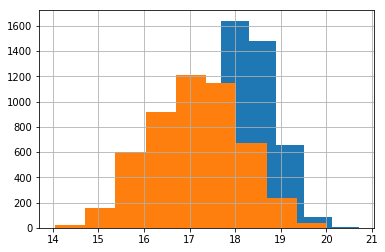

In [34]:
data.groupby('class').r_auto.hist()

Qual é a média e desvio padrão de r_auto das galáxias? E das estrelas?

In [36]:
data.r_auto.mean()

17.65074500000005

In [37]:
data.r_auto.std()

1.0160196871003317

Considerando apenas FWHM, A e B, faça um sns.pairplot por classe. O que você conclui? 

In [39]:
sns.pairplot(data, hue='FWHM_n')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f9ca7eb7c80> (for post_execute):


KeyboardInterrupt: ignored

Use model_selection.train_test_split do sklearn para dividir seu dataset em amostra de treinamento e de teste:   X_train, X_test, y_train, y_test = train_test_split([complete!]) 

Use novamente o train_test_split() para separar seu X_train e y_train em treinamento e validação (Cuidado! Lembre que X_train e y_train são dados pareados)

Escolha pelo menos um algoritmo:  tree.DecisionTreeClassifier() ensemble.RandomForestClassifier() neighbours.KNeighborsClassifier() svm.SVC() 


Treinem alguns modelos variando os parâmetros. Use sua amostra de validação para avaliar a performance de cada modelo. Qual deu o melhor resultado?
